In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re 
import seaborn as sns
import math 
import collections
from pycocotools.coco import COCO
import requests
import plotly.express as px
# from jupyter_dash import JupyterDash
# from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
from os import listdir
from os.path import isfile, join
import base64
import itertools
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
sns.set(style='whitegrid', font_scale=1.6, font='Georgia', context='paper')

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import operator
import plotly.figure_factory as ff
import scipy
import pickle 

/tmp/ipykernel_2990720/826376831.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [63]:
def generate_distributions(base_path, df, title, sample=None):
    if sample != None:
        #sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_random/seed_388/budget_10.pkl'
        with open(sample, 'rb') as f:
            sampled_ids = pickle.load(f)
        df = df.loc[df['question_id'].isin(sampled_ids)]
    
    plt.figure(figsize=(50,10))
    # questions = df['Question'].tolist()
    # questions = [i[0].lower() for i in questions]

    # with open("../data/vqa/mscoco_question_types.txt") as f:
    #     question_types_list = f.read().splitlines() 
    # question_types_list = list(set(question_types_list))
    # question_types_list = sorted(question_types_list, key=len) 
    # question_types_list.reverse()
    
    # question_types_freq = {}
    # for i in question_types_list:
    #     question_types_freq[i] = 0

    # for question in questions:
    #     counter = 0
    #     for question_type in question_types_freq:
    #         if question.startswith(question_type):
    #             question_types_freq[question_type] +=1
    #             counter+=1
    #             break 
    #     if counter == 0:
    #         question_types_freq['none of the above'] +=1
    # res = sum(list(question_types_freq.values()))
    # assert res == len(questions)
    # question_types_freq = dict( sorted(question_types_freq.items(), key=operator.itemgetter(1),reverse=True))
    # question_types_list = list(question_types_freq.keys())
    # question_types_freq_list = list(question_types_freq.values())
    # data = {'Question Type': question_types_list, 'Frequency': question_types_freq_list}
    # question_freqs = pd.DataFrame.from_dict(data)

    targets = df['Target'].tolist()
    targets = [i[0] for i in targets]
    df['Target'] = targets
    unique_vals = df['Target'].unique()

    all_animals = ["sheep",  "peacock", "dog", "cardinal", "butterfly", "seagull", "polar bear", "fox", "turkey", "duck", "stork", "bull", "snake", "turtle", "bat", "penguin", 
    "antelope", "woodpecker", "pony", "canopy", "salmon", "lamb", "bunny", "owl", "horse", "pig", "cow", "pelican", "swan", "elephant", "frog", "ostrich", 
    "squirrel", "monkey", "bird", "spider", "wildebeest", "crow", "clams", "giraffe", "lizard", "lab", "crane", "alligator", "panda", "kitten", "hawk", 
    "parrot", "octopus", "mouse", "goat", "tiger", "puppy", "ladybug", "lobster", "whale", "pigeon", "donkey", "goose", "zebra", "blue jay", "parakeet",
    "worms", "shrimp", "camel", "deer", "shark", "bear", "robin", "dinosaur", "flamingo", "ram", "tuna", "lion", "eagle", "finch", "kangaroo", "elm", "buffalo", 
    "cat", "pitbull", "leopard", "puma", "rabbit", "chicken", "hummingbird", "dragon", "fish", "cub", "rooster", "orioles", "labrador", "grizzly", "polar", 
    "clydesdale", "dalmatian", "german shepherd", "shepherd", "golden retriever", "poodle", "dachshund", "schnauzer", "pomeranian", "bulldog", "corgi", "tabby", 
    "chihuahua", "husky", "beagle", "sheepdog", "pug", "collie", "mutt", "calico", "shih tzu", "siamese", "terrier", "rottweiler", "greyhound", "boxer", 
    "cocker spaniel", "sparrow", "savannah"]

    main_list = list(set(all_animals) - set(unique_vals))
    print((main_list))
    target_counts = df['Target'].value_counts()
    palette_color = sns.color_palette('pastel')
    ax = target_counts.plot(kind='pie', colors=palette_color, textprops={'fontsize': 7}, rotatelabels=True)
    ax.set_title(title +' Target Distribution')

    # palette_color = sns.color_palette('pastel')
    # plt.pie(data=target_counts, colors=palette_color, autopct='%.0f%%')
  
    # displaying chart
    #plt.show()



    # chart = sns.countplot(x="Target", data=df, palette='Set1', order = df['Target'].value_counts().index)
    # chart.set_title(title +' Target Distribution')
    # chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    # figure = chart.get_figure()
    # figure.tight_layout()
    #figure.savefig(base_path+'_target_distribution.pdf', format='pdf', dpi=400, pad_inches=0.3)

    # chart2 = sns.barplot(x='Question Type', y='Frequency', data=question_freqs, palette='Set1')
    # chart2.set_title(title + ' Question Distribution')
    # #chart2 = sns.countplot(x="Question Type", data=question_freqs, palette='Set1', order = df['Question Type'].value_counts().index)
    # chart2.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    # figure2 = chart2.get_figure()    
    # figure2.tight_layout()
    # figure2.savefig(base_path+'_question_distribution.pdf', format='pdf', dpi=400, pad_inches=0.3)
    #return questions

0
<class 'pandas.core.series.Series'>


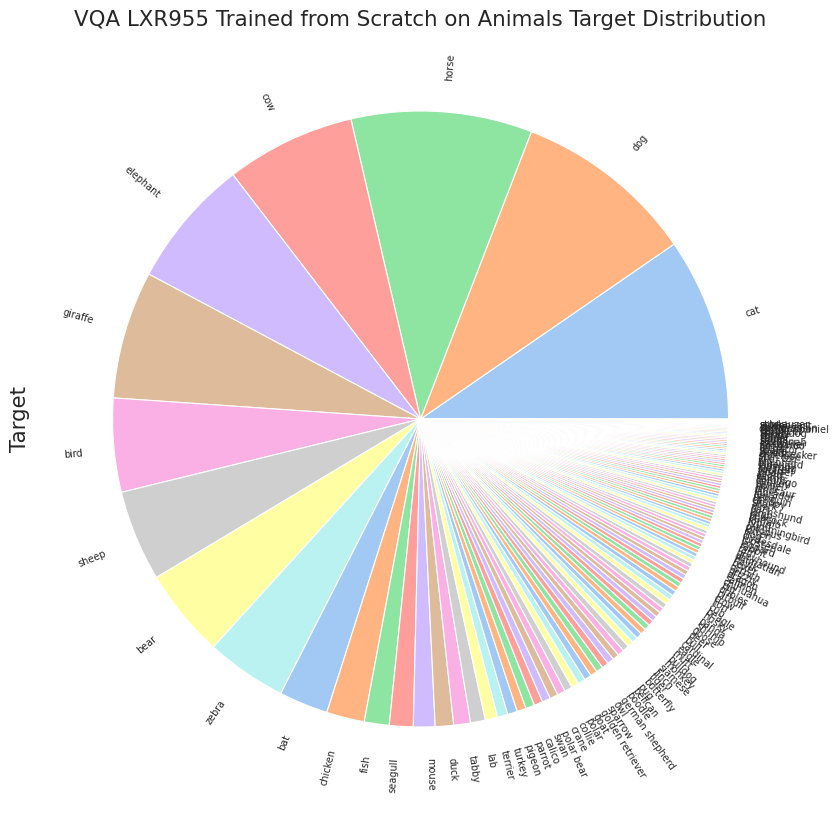

In [61]:
base_path ='../snap/vqa/LXR111/animals/other/vqa_lxr111_animals_fromScratch_20epochs_breeds/'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='VQA LXR955 Trained from Scratch on Animals')


['shepherd', 'wildebeest', 'buffalo', 'shark', 'lamb', 'worms', 'schnauzer', 'spider', 'blue jay', 'lizard', 'parakeet', 'pomeranian', 'rottweiler', 'snake', 'lobster', 'rabbit']
['pomeranian', 'stork', 'sheepdog']
[]


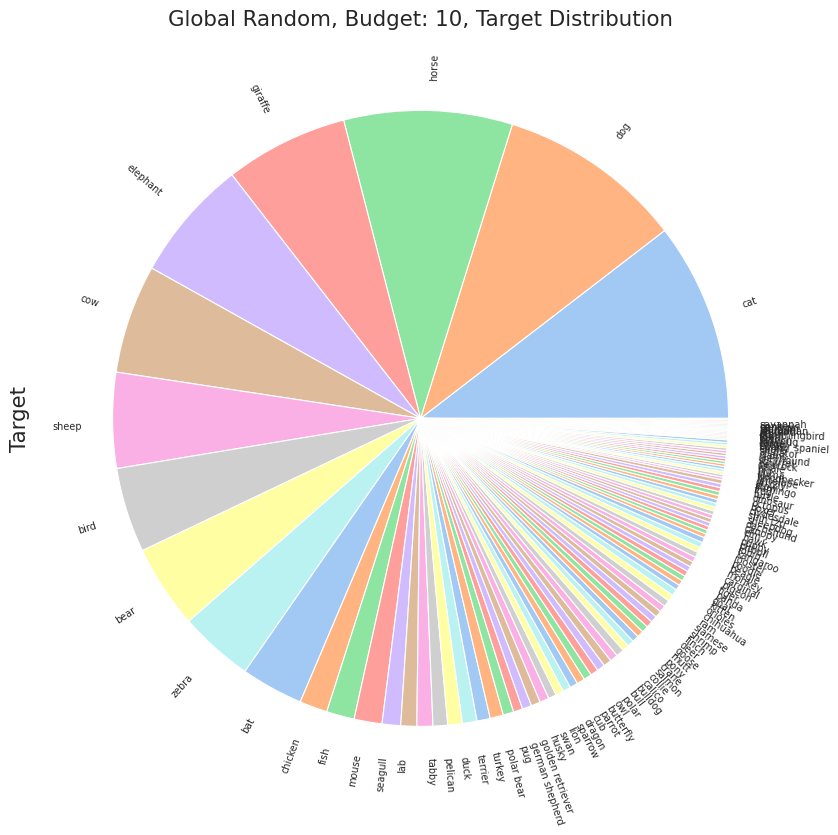

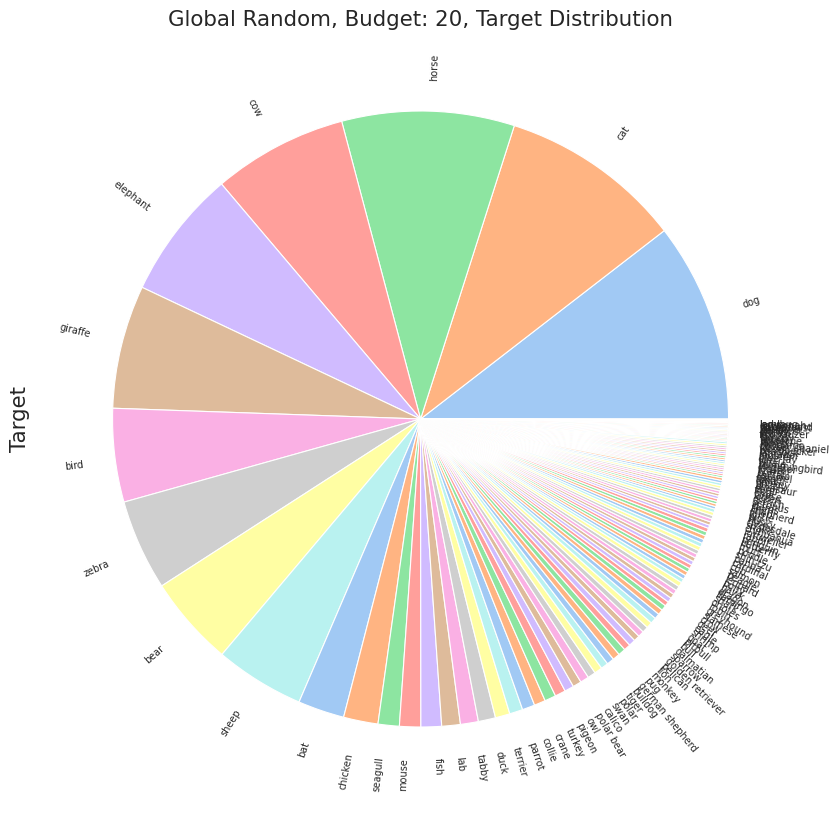

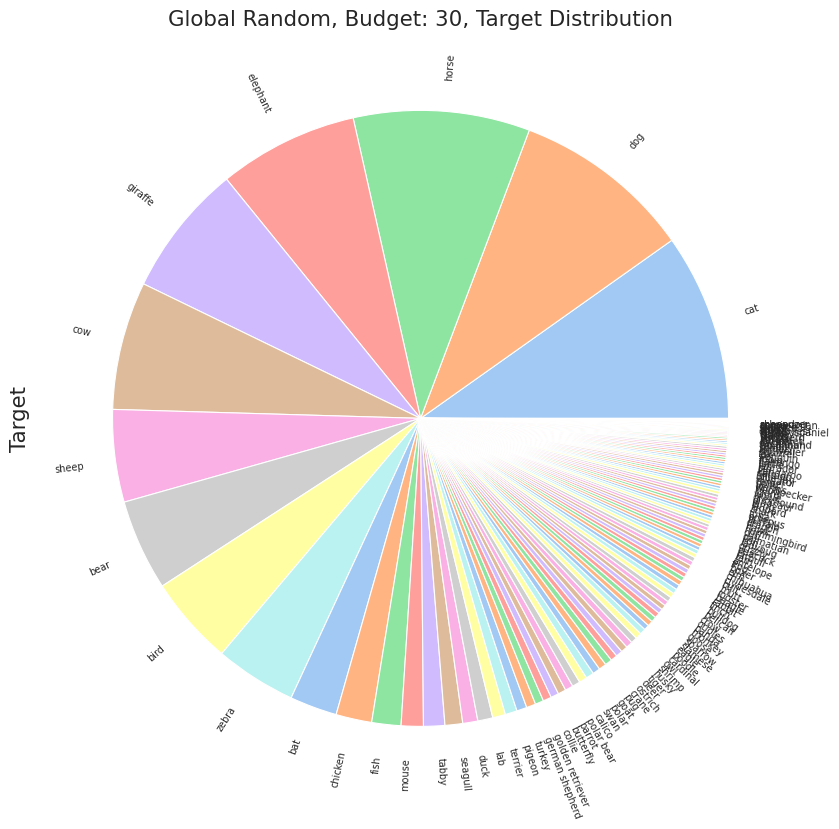

In [66]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_random/seed_388/budget_10.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Global Random, Budget: 10,', sample=sampled_question_ids_path)

sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_random/seed_388/budget_20.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Global Random, Budget: 20,', sample=sampled_question_ids_path)


sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_random/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Global Random, Budget: 30,', sample=sampled_question_ids_path)

['camel', 'chihuahua', 'pigeon', 'mutt', 'puppy', 'pig', 'corgi', 'tuna', 'husky', 'monkey', 'donkey', 'swan', 'beagle', 'frog', 'duck', 'parakeet', 'canopy', 'snake', 'german shepherd', 'fox', 'pelican', 'dachshund', 'antelope', 'calico', 'kitten', 'alligator', 'dragon', 'ostrich', 'elm', 'bulldog', 'poodle', 'robin', 'schnauzer', 'kangaroo', 'parrot', 'owl', 'dinosaur', 'turkey', 'goose', 'ram', 'ladybug', 'wildebeest', 'deer', 'buffalo', 'clydesdale', 'rooster', 'spider', 'pug', 'leopard', 'orioles', 'polar bear', 'penguin', 'cardinal', 'lobster', 'clams', 'panda', 'golden retriever', 'bunny', 'terrier', 'tiger', 'peacock', 'whale', 'blue jay', 'turtle', 'pomeranian', 'lizard', 'shih tzu', 'puma', 'shepherd', 'bull', 'siamese', 'lamb', 'worms', 'labrador', 'lion', 'fish', 'finch', 'butterfly', 'goat', 'rabbit', 'sheepdog', 'hawk', 'boxer', 'savannah', 'crane', 'sparrow', 'collie', 'dalmatian', 'shrimp', 'salmon', 'rottweiler', 'hummingbird', 'pony', 'crow', 'greyhound', 'shark', 'ea

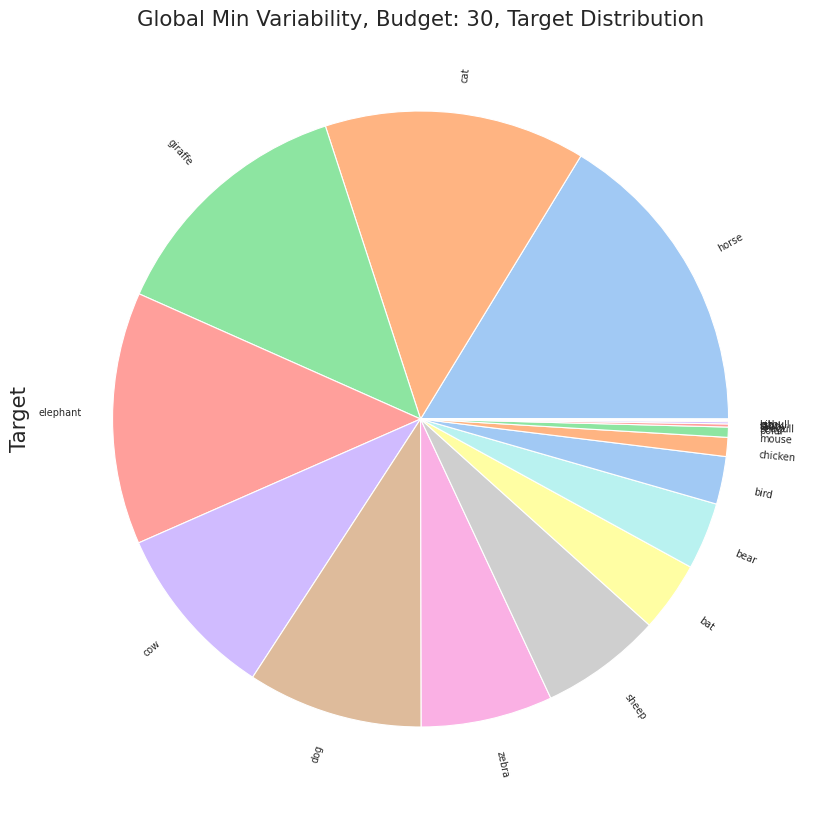

In [67]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_min_variability/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Global Min Variability, Budget: 30,', sample=sampled_question_ids_path)

[]


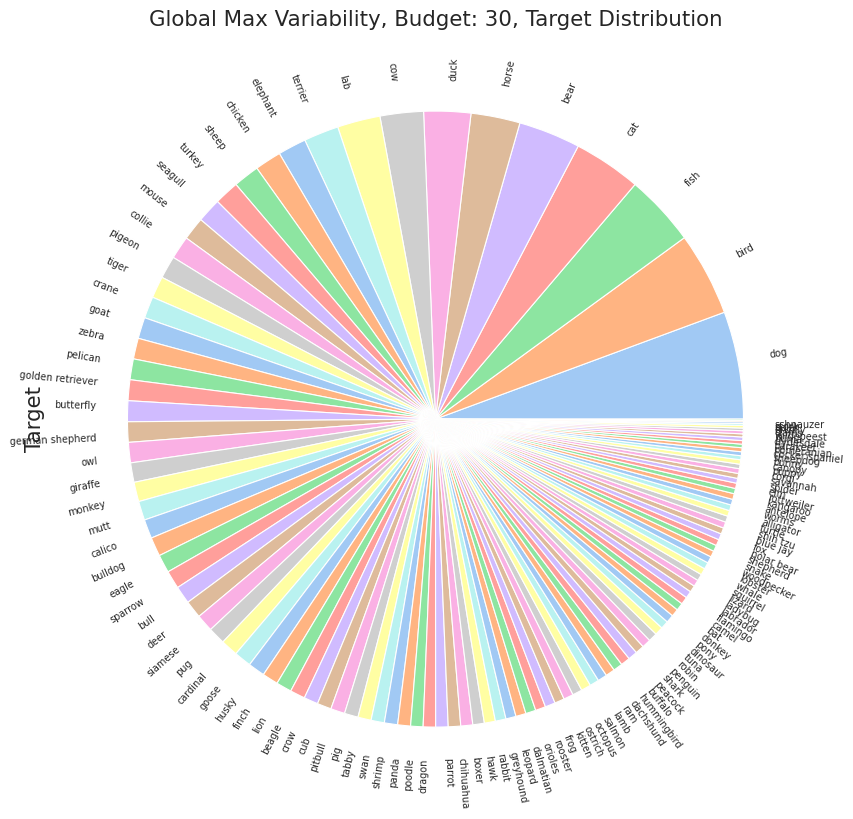

In [68]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_max_variability/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Global Max Variability, Budget: 30,', sample=sampled_question_ids_path)

[]


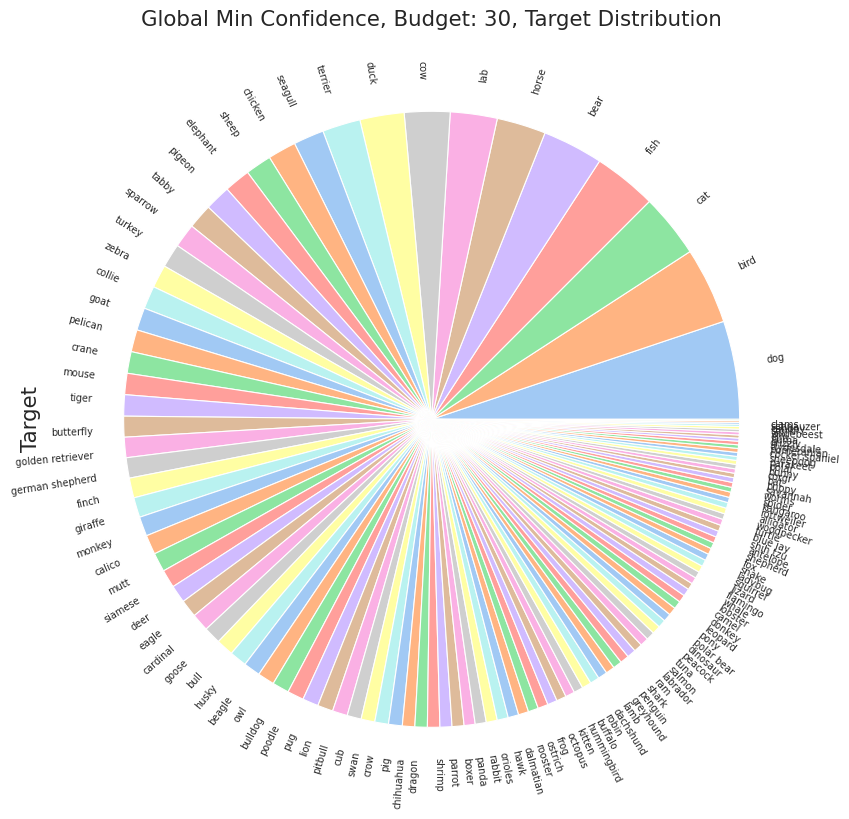

In [69]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_min_confidence/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Global Min Confidence, Budget: 30,', sample=sampled_question_ids_path)

['stork', 'pitbull', 'camel', 'chihuahua', 'pigeon', 'mutt', 'puppy', 'pig', 'corgi', 'tuna', 'husky', 'monkey', 'donkey', 'swan', 'beagle', 'frog', 'duck', 'parakeet', 'canopy', 'snake', 'german shepherd', 'fox', 'pelican', 'dachshund', 'antelope', 'calico', 'kitten', 'alligator', 'dragon', 'ostrich', 'elm', 'bulldog', 'poodle', 'robin', 'schnauzer', 'kangaroo', 'parrot', 'owl', 'dinosaur', 'turkey', 'goose', 'ram', 'ladybug', 'wildebeest', 'deer', 'buffalo', 'clydesdale', 'rooster', 'spider', 'pug', 'leopard', 'orioles', 'polar bear', 'penguin', 'cardinal', 'lobster', 'clams', 'panda', 'golden retriever', 'bunny', 'terrier', 'tiger', 'peacock', 'whale', 'blue jay', 'turtle', 'pomeranian', 'lizard', 'shih tzu', 'puma', 'shepherd', 'bull', 'siamese', 'lamb', 'worms', 'labrador', 'lion', 'fish', 'finch', 'butterfly', 'goat', 'rabbit', 'sheepdog', 'hawk', 'lab', 'boxer', 'savannah', 'crane', 'sparrow', 'collie', 'dalmatian', 'shrimp', 'salmon', 'rottweiler', 'hummingbird', 'pony', 'crow'

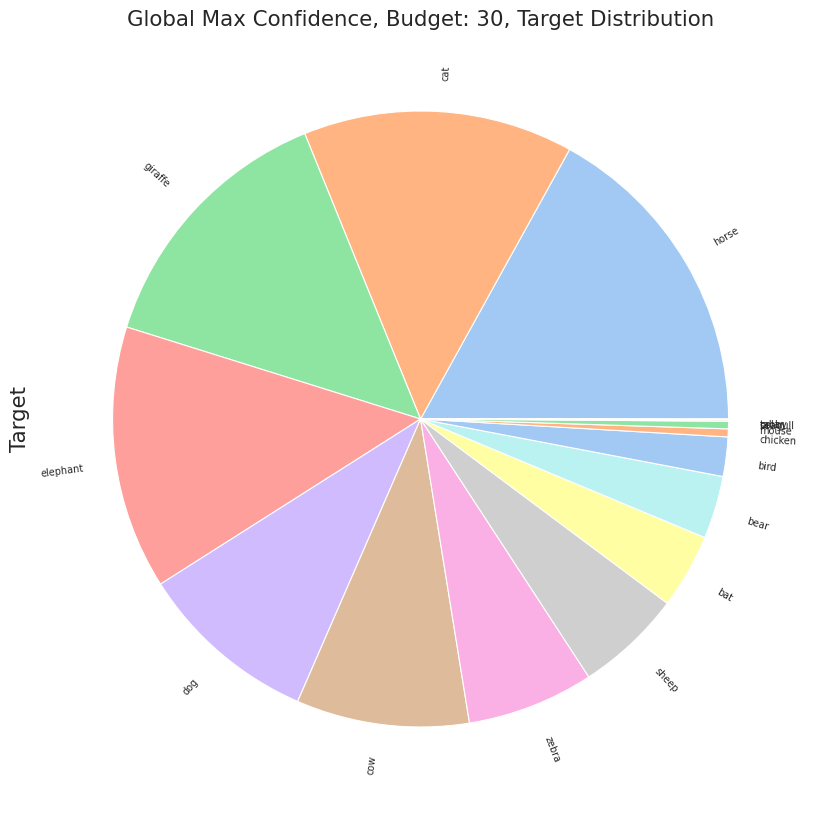

In [70]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/global_max_confidence/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Global Max Confidence, Budget: 30,', sample=sampled_question_ids_path)

[]


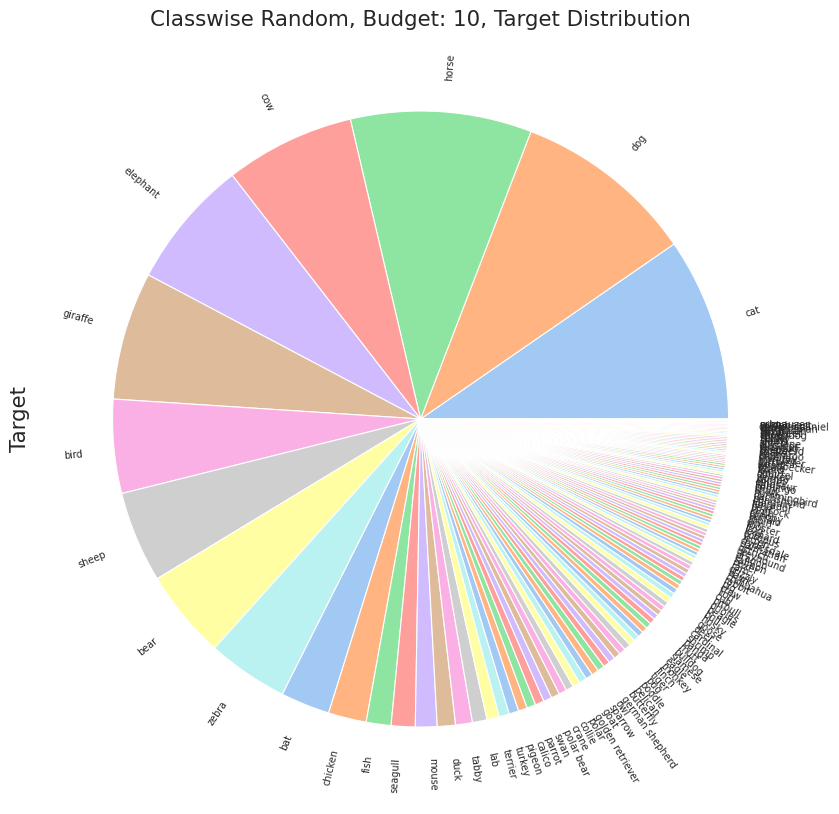

In [71]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/random/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Random, Budget: 10,', sample=sampled_question_ids_path)

['schnauzer', 'stork']
[]
[]


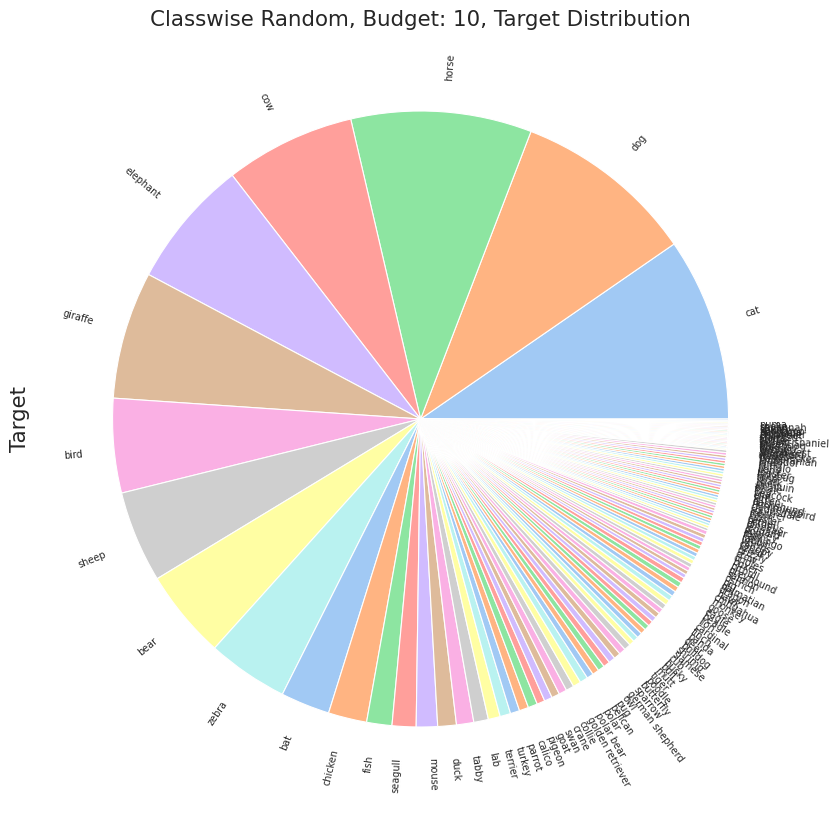

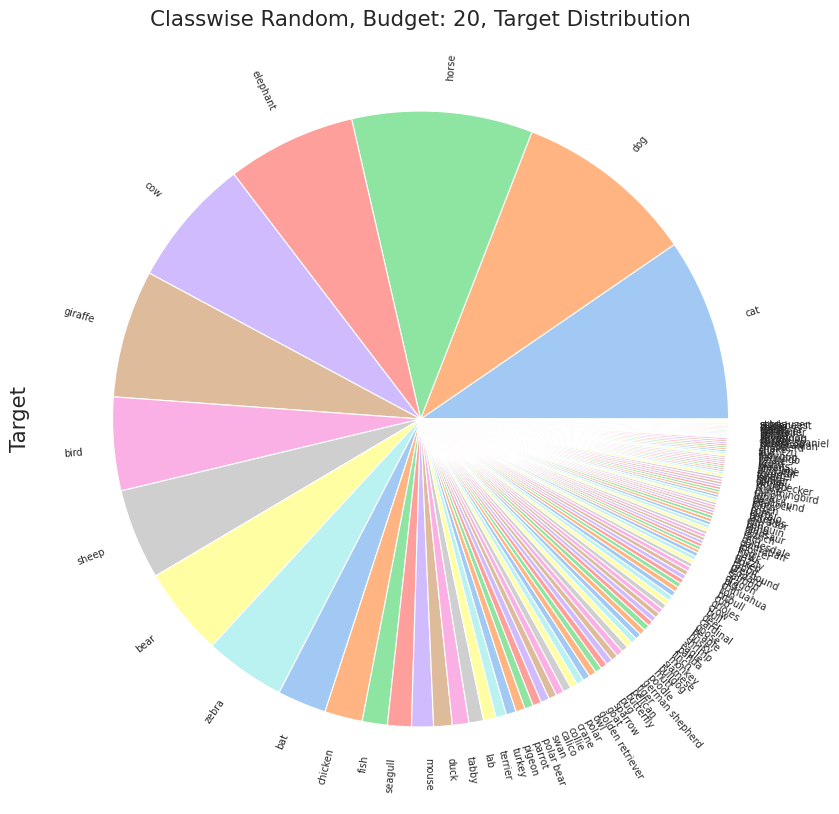

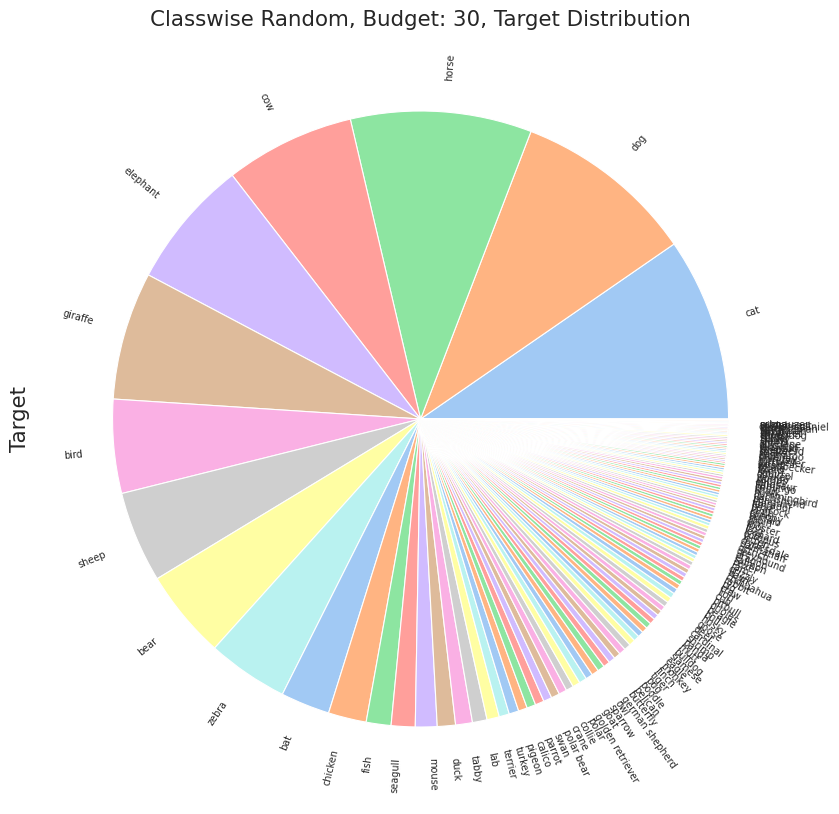

In [73]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/random/seed_388/budget_10.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Random, Budget: 10,', sample=sampled_question_ids_path)

sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/random/seed_388/budget_20.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Random, Budget: 20,', sample=sampled_question_ids_path)


sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/random/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Random, Budget: 30,', sample=sampled_question_ids_path)

In [72]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/min_variability/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Min Variability, Budget: 30,', sample=sampled_question_ids_path)

FileNotFoundError: [Errno 2] No such file or directory: '../src/dataset_selection/sampling/samples/LXR111/animals/min_variability/seed_388/budget_30.pkl'

In [ ]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/max_variability/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Max Variability, Budget: 30,', sample=sampled_question_ids_path)

In [ ]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/min_confidence/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Min Confidence, Budget: 30,', sample=sampled_question_ids_path)

In [ ]:
sampled_question_ids_path = '../src/dataset_selection/sampling/samples/LXR111/animals/max_confidence/seed_388/budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")
generate_distributions(base_path, df, title='Classwise Max Confidence, Budget: 30,', sample=sampled_question_ids_path)